<a href="https://colab.research.google.com/github/jumanajouhar/DocumentClustering/blob/main/document_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyclustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, adjusted_rand_score, normalized_mutual_info_score
from pyclustering.cluster.kmedoids import kmedoids
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load BBC News dataset from CSV file
file_path = "/content/drive/MyDrive/bbc-news.csv"
df = pd.read_csv(file_path)

In [ ]:
# Drop missing values if any
df.dropna(inplace=True)

In [ ]:
# Encode category labels
label_encoder = LabelEncoder()
df['Encoded_Category'] = label_encoder.fit_transform(df['Category'])

In [ ]:
# Extract text and category labels
documents = df['Text'].astype(str).tolist()
labels = df['Encoded_Category'].values
k = len(label_encoder.classes_)  # Number of unique categories

In [ ]:
# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(documents).toarray()

In [ ]:
# Reduce dimensionality for visualization
pca = PCA(n_components=50, random_state=42).fit_transform(X)
tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(pca)

In [ ]:
# K-Means Clustering
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
kmeans_labels = kmeans.fit_predict(X)

In [ ]:
# K-Medoids Clustering
initial_medoids = np.random.choice(len(X), k, replace=False)
kmedoids_instance = kmedoids(cdist(X, X), initial_medoids, data_type='distance_matrix')
kmedoids_instance.process()
kmedoids_labels = np.zeros(len(X))
for i, cluster in enumerate(kmedoids_instance.get_clusters()):
    kmedoids_labels[cluster] = i

In [ ]:
# Evaluation Metrics
kmeans_ari = adjusted_rand_score(labels, kmeans_labels)
kmedoids_ari = adjusted_rand_score(labels, kmedoids_labels)

kmeans_nmi = normalized_mutual_info_score(labels, kmeans_labels)
kmedoids_nmi = normalized_mutual_info_score(labels, kmedoids_labels)

kmeans_f1 = f1_score(labels, kmeans_labels, average='weighted')
kmedoids_f1 = f1_score(labels, kmedoids_labels, average='weighted')

In [ ]:
# Store Results
results_df = pd.DataFrame({
    'Method': ['K-Means', 'K-Medoids'],
    'Adjusted Rand Index': [kmeans_ari, kmedoids_ari],
    'Normalized Mutual Info': [kmeans_nmi, kmedoids_nmi],
    'F1 Score': [kmeans_f1, kmedoids_f1]
})
print(results_df)

      Method  Adjusted Rand Index  Normalized Mutual Info  F1 Score
0    K-Means             0.566695                0.671922  0.442960
1  K-Medoids             0.422449                0.455038  0.480894


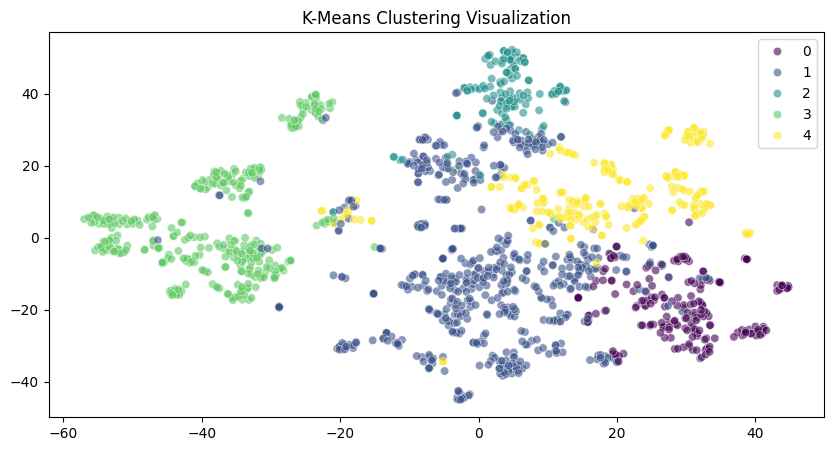

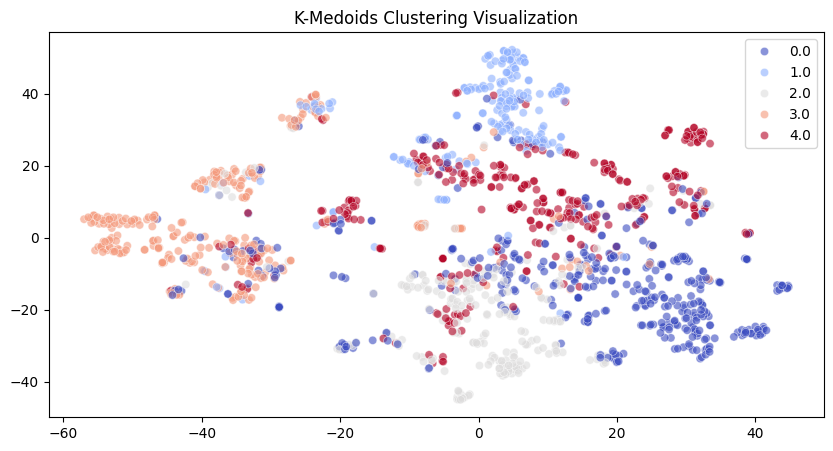

In [ ]:
# Visualization of Clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=kmeans_labels, palette='viridis', alpha=0.6)
plt.title('K-Means Clustering Visualization')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=kmedoids_labels, palette='coolwarm', alpha=0.6)
plt.title('K-Medoids Clustering Visualization')
plt.show()